
# Project: Investigate a Dataset - [NO SHOW APPOINTME]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* PatientId --> Identification of a patient

* AppointmentID --> Identification of each appointment

* Gender --> Male or Female.

* DataMarcacaoConsulta --> The day of the actuall appointment, when they have to visit the doctor.

* DataAgendamento --> The day someone called or registered the appointment, this is before appointment of course.

* Age --> How old is the patient.

* Neighbourhood --> Where the appointment takes place.

* Scholarship --> True of False. 

* Hipertension --> True or False.

* Diabetes --> True or False.

* Alcoholism --> True of False. 

* Handcap --> True of False. 

* SMS_received --> 1 or more messages sent to the patient.

* No-show --> True of False. 




### Question(s) for Analysis

###### 1 - Does the day of registration affect attendace?

###### 2 - Does the number of messages affect attendace?

###### 3 - Does the ages affect attendace?

###### 4 - Does the Diabetes affect attendace?

###### 5 - Does the Alcoholism  affect attendace?

###### 6 - To What extent does the neighbourhood  affect the attendance?

###### 7 -  Does the Hipertension  affect the attendance?

###### 8 - Is the attendance rate higher or not?

###### 9 - Does the Scholarship affect attendace?
> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
sum(df.duplicated())

0

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.isnull().any()  # ensure there are  NaN Values

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [10]:
df.describe() #statistical veiw

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Dataset shows

* PatientID is float and it should be int.
* ScheduledDay & AppointmentDay should be date not string .
* there are some data with wrong entery like hipertension\handcap.
* min Age = -1


### Data Cleaning

In [11]:
# convert PatientID is float to be int.
df['PatientId'] = df['PatientId'].astype('int') 

In [12]:
# to insure that 
df['PatientId'].dtypes

dtype('int64')

In [13]:
# convert ScheduledDay & AppointmentDay to date not string .
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [14]:
# to insure that 
print(df['ScheduledDay'].dtypes)
print(df['AppointmentDay'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [15]:
# Removing under zero age
df = df[df['Age'] > -1] 
# to insure that
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f867900e438>,
      dtype=object)

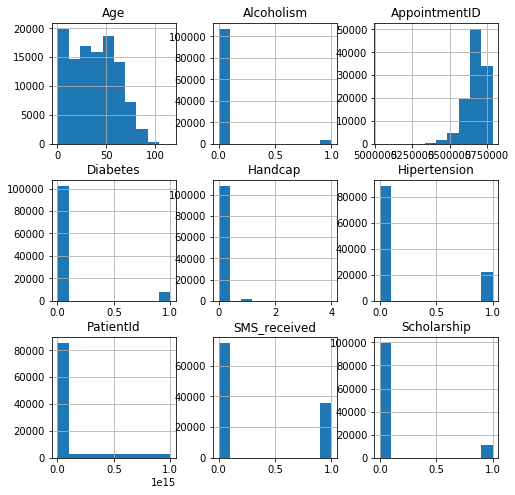

In [16]:
df.hist(figsize = (8,8))

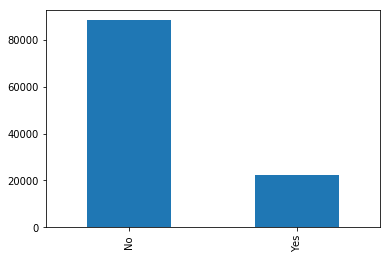

In [17]:
df['No-show'].value_counts().plot(kind='bar')

###### its about 20 % not attend (no show) appointment without cancellation and 80 % of patient attend there appointments.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8678bb86a0>,
      dtype=object)

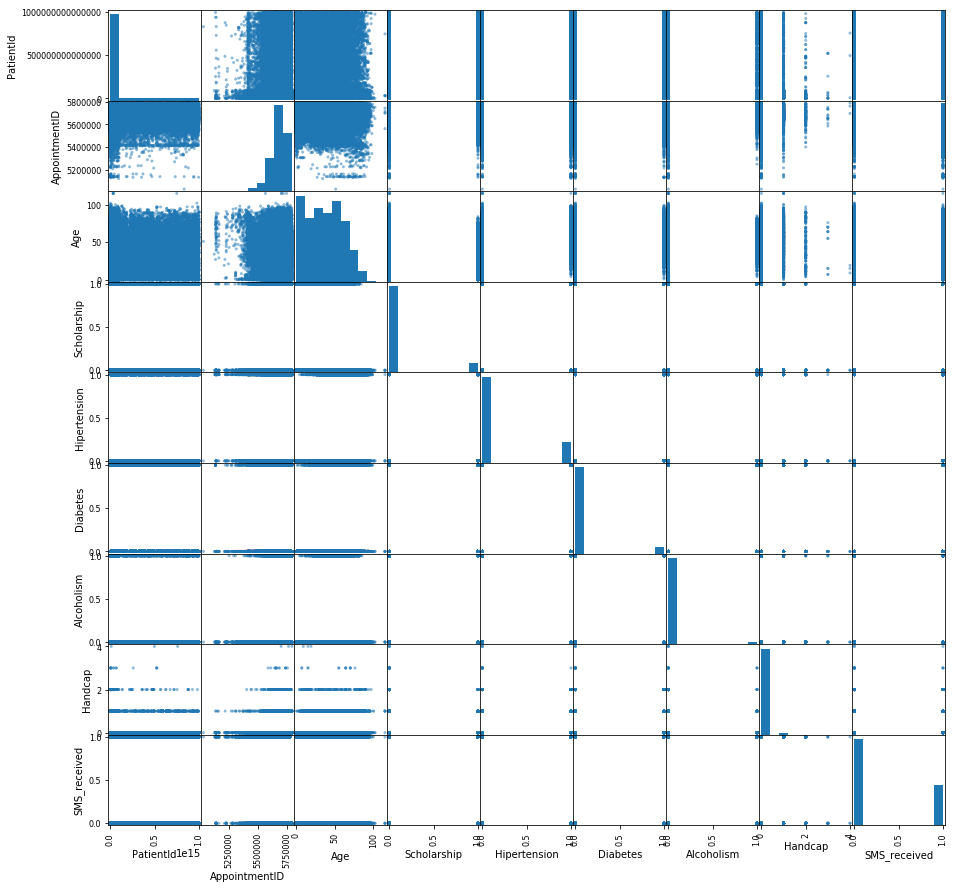

In [18]:
pd.plotting.scatter_matrix(df, figsize =(15,15))

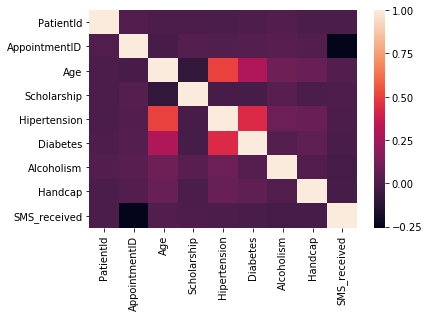

In [19]:
cormat = df.corr()
sns.heatmap(cormat);

In [20]:
def pie_plot(column, title):
    df[column].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
    plt.title(title)

### Research Question 1 (Does the gender affect attendace?)

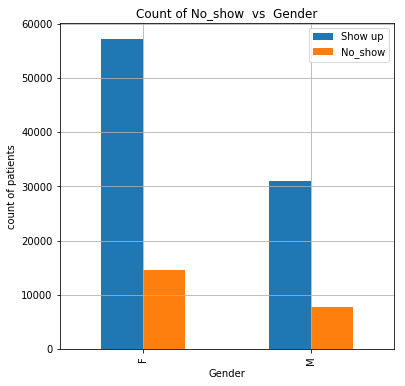

In [21]:
# plot this is relationship
x=df.groupby(["Gender","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of No_show  vs  Gender") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");

###### the count of  female patients are Greater than male patients and also Show up

### Research Question 2  (Does the number of messages affect attendace?)

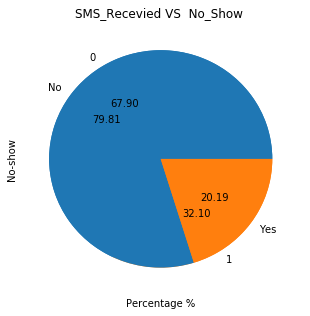

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['SMS_received'].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
df['No-show'].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
plt.xlabel('Percentage %');
plt.title('SMS_Recevied VS  No_Show ');

###### Although 67.90 % didn't recieve SMS ...they attendance appointment

### Research Question 3 (Does the Alcoholism affect attendace?)

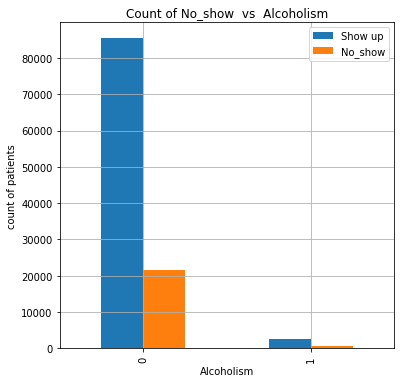

In [23]:
x=df.groupby(["Alcoholism","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of No_show  vs  Alcoholism") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");

###### Only 3.04 % are alcohol dependant patients.

### Research Question 4(Does the Diabetes affect attendace?)

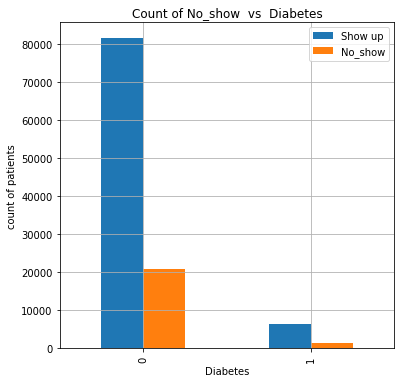

In [24]:
x=df.groupby(["Diabetes","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of No_show  vs  Diabetes") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");

###### Only 7.19 % of Patient have diabetes , and 92.81 have no diabetes

#### Research Question 5( Does the Hipertension affect the attendance?)

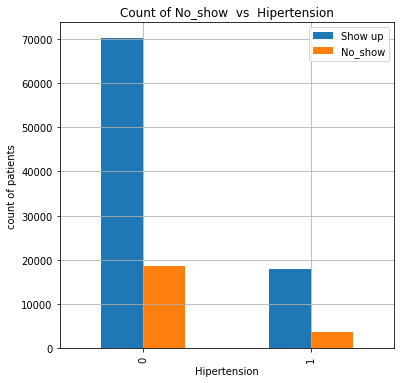

In [25]:
x=df.groupby(["Hipertension","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of No_show  vs  Hipertension") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");

Only 19.7 % of Patient have hypertension, and 80.3 have are hypertension .

### Research Question 6 (To What extent does the neighbourhood affect the attendance?)

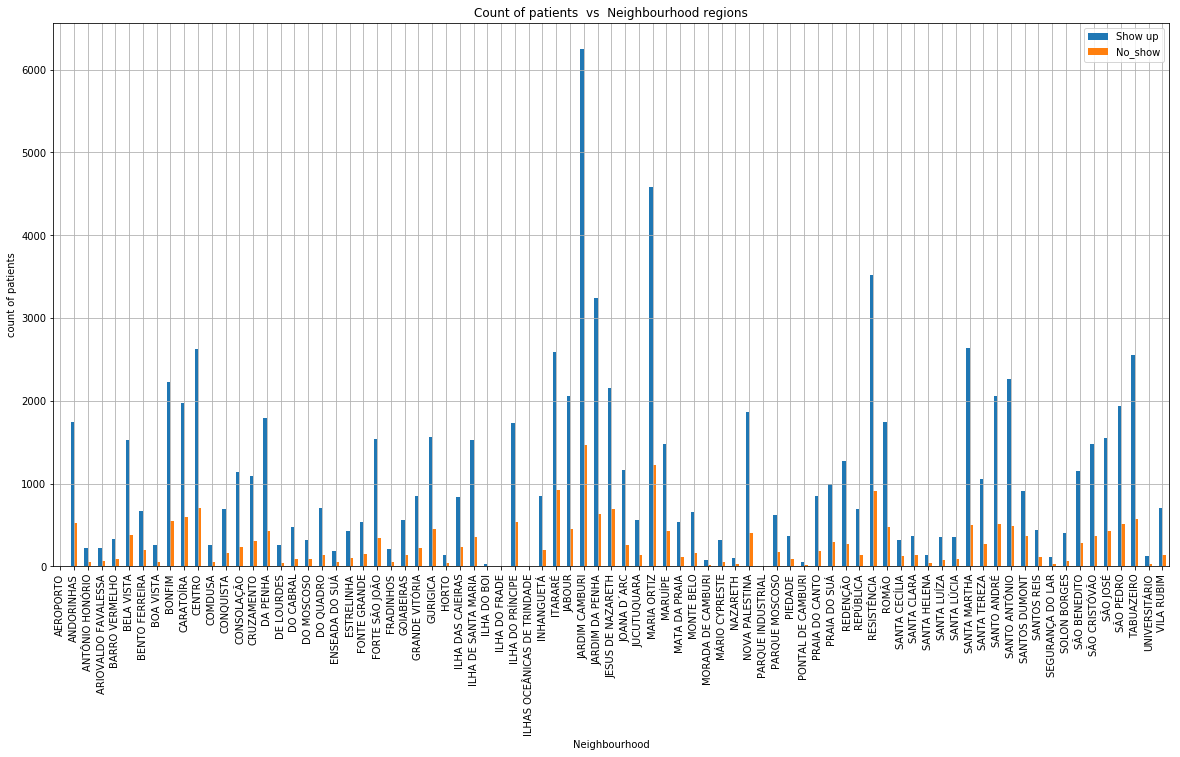

In [26]:
y=df.groupby(['Neighbourhood','No-show']).count()
y["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(20,10),grid=True);
plt.title("Count of patients  vs  Neighbourhood regions") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");


#### No noticable area  ..but JARDIM CAMBURI Showing high contribution .

#### Research Question 7 (Does the Scholarship affect the attendance?)

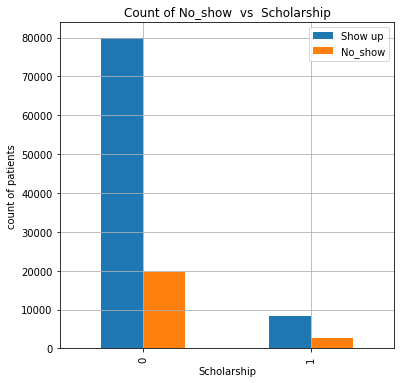

In [27]:
x=df.groupby(["Scholarship","No-show"]).count()
x["PatientId"].unstack().plot(kind="bar",stacked=False,figsize=(6,6),grid=True);
plt.title("Count of No_show  vs  Scholarship") #change title for the plot
plt.legend(["Show up", "No_show"]); #change legend for each color of data
plt.ylabel("count of patients");

#### Question Researsh 8 (Percentage of diabetic Patients VS Non_Diabetic)

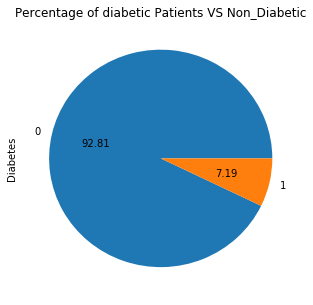

In [30]:
pie_plot(column='Diabetes',title='Percentage of diabetic Patients VS Non_Diabetic');

###### Only 7.19 % of Patient have diabetes , and 92.81 have no diabetes.

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0